Links: 

1. https://www.analyticsvidhya.com/blog/2018/12/introduction-face-detection-video-deep-learning-python/

2. https://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/

3. https://medium.com/analytics-vidhya/masking-an-area-in-a-video-in-opencv-in-python-harry-potter-invisible-cloak-example-a25279fdc26c


In [1]:
import os
import cv2
import face_recognition
import matplotlib.pyplot as plt

In [20]:
pip freeze > .venv/requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [14]:
input_movie = cv2.VideoCapture("samples/e11.mov")

In [10]:
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))
length

334

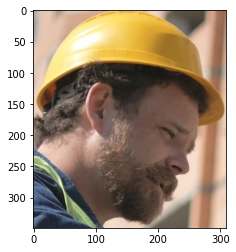

In [60]:
image = face_recognition.api.load_image_file("samples/se111.jpg")
plt.imshow(image)

In [61]:
face_encoding = face_recognition.api.face_encodings(image)
known_faces = [face_encoding,]

In [18]:
# Initialize variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0


while True:
    # Grab a single frame of video
    ret, frame = input_movie.read()
    frame_number += 1

    # Quit when the input video file ends
    if not ret:
        break


    # Convert the image from BGR color (which OpenCV uses) to        RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]
    
    
    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame, model="cnn")
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

        name = None
        if match[0]:
            name = "Engineer"

        face_names.append(name)

    # Label the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
    print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

# All done!
input_movie.release()
cv2.destroyAllWindows()


MemoryError: bad allocation